<a href="https://colab.research.google.com/github/gorkhumaryan/cnn-multiclass-image-classifier/blob/main/train_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os, shutil, random
from sklearn.metrics import classification_report
import numpy as np

In [104]:
SOURCE_DIR = "processed_data"
TARGET_DIR = "data_split"

TRAIN_RATIO = 0.7
VAL_RATIO = 0.15

random.seed(42)

if not os.path.exists(TARGET_DIR):
    for split in ["train", "val", "test"]:
        os.makedirs(os.path.join(TARGET_DIR, split), exist_ok=True)

    for class_name in os.listdir(SOURCE_DIR):
        class_path = os.path.join(SOURCE_DIR, class_name)
        images = os.listdir(class_path)
        random.shuffle(images)

        n_total = len(images)
        n_train = int(n_total * TRAIN_RATIO)
        n_val = int(n_total * VAL_RATIO)

        splits = {
            "train": images[:n_train],
            "val": images[n_train:n_train+n_val],
            "test": images[n_train+n_val:]
        }

        for split, imgs in splits.items():
            split_class_dir = os.path.join(TARGET_DIR, split, class_name)
            os.makedirs(split_class_dir, exist_ok=True)
            for img in imgs:
                shutil.copy(
                    os.path.join(class_path, img),
                    os.path.join(split_class_dir, img)
                )


In [105]:
IMG_SIZE = (96, 96)
BATCH_SIZE = 12
EPOCHS = 30
SEED = 42

In [106]:
tmp_ds = tf.keras.utils.image_dataset_from_directory(
    "data_split/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

CLASS_NAMES = tmp_ds.class_names
NUM_CLASSES = len(CLASS_NAMES)

print("Classes:", CLASS_NAMES)


Found 16576 files belonging to 4 classes.
Classes: ['angry', 'disgust', 'fear', 'surprise']


In [107]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "data_split/train",
    class_names=CLASS_NAMES,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "data_split/val",
    class_names=CLASS_NAMES,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "data_split/test",
    class_names=CLASS_NAMES,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 16576 files belonging to 4 classes.
Found 3552 files belonging to 4 classes.
Found 3552 files belonging to 4 classes.


In [108]:
print(train_ds.class_names)
print(val_ds.class_names)
print(test_ds.class_names)


['angry', 'disgust', 'fear', 'surprise']
['angry', 'disgust', 'fear', 'surprise']
['angry', 'disgust', 'fear', 'surprise']


In [109]:
class_names = train_ds.class_names
NUM_CLASSES = len(class_names)


In [110]:
print(class_names)

['angry', 'disgust', 'fear', 'surprise']


In [111]:
data_augmentation = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.05),

])

In [112]:
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, 3, activation='relu', input_shape=(96, 96, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),

    layers.Dense(NUM_CLASSES, activation = 'softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [113]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [114]:
early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 8,
    restore_best_weights = True
)

In [115]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = EPOCHS,
    callbacks=[early_stop]
)

Epoch 1/30
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.3823 - loss: 1.2795 - val_accuracy: 0.5084 - val_loss: 1.0728
Epoch 2/30
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.4999 - loss: 1.1214 - val_accuracy: 0.5693 - val_loss: 1.0097
Epoch 3/30
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5467 - loss: 1.0443 - val_accuracy: 0.5935 - val_loss: 0.9460
Epoch 4/30
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.5705 - loss: 0.9902 - val_accuracy: 0.6067 - val_loss: 0.9415
Epoch 5/30
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.5808 - loss: 0.9595 - val_accuracy: 0.6267 - val_loss: 0.8821
Epoch 6/30
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.5896 - loss: 0.9298 - val_accuracy: 0.6374 - val_loss: 0.8498
Epoch 7/30
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6055 - loss: 0.9108 - val_accuracy: 0.6425 - val_loss: 0.8467
Epoch 8/30
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.6199 -

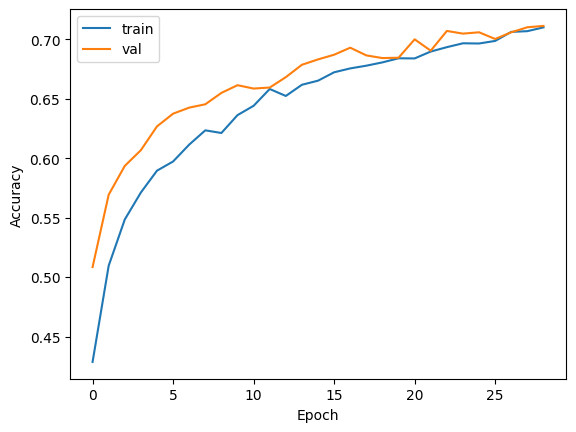

In [116]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'val')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

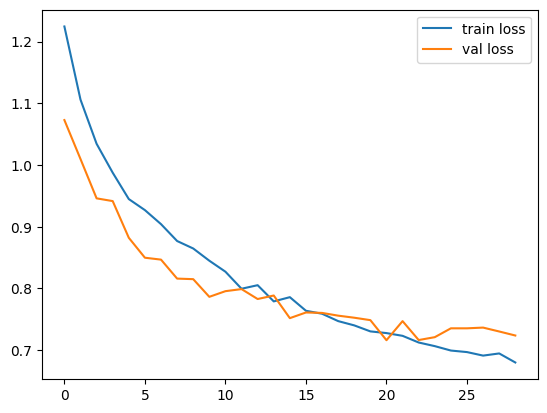

In [117]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


In [118]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7125 - loss: 0.7116
Test accuracy: 0.7035


In [122]:
model.save('cnn_emotion_96x96.keras')

y_true, y_pred = [], []
for x, y in test_ds:
  p = model.predict(x)
  y_true.extend(y.numpy())
  y_pred.extend(np.argmax(p, axis=1))

print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━